# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Firza Fernanda
- **Email:** firzafernanda17@gmail.com
- **ID Dicoding:** benarinifirza17

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Pertanyaan 2 : Pada jam berapa sewa sepeda paling banyak terjadi?

## Import Semua Packages/Library yang Digunakan

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import streamlit as st

## Data Wrangling

Pada tahap ini, **hour.csv** dan **day.csv** digabungkan menjadi **mergered_dataset.csv** untuk memudahkan analisis data secara keseluruhan

In [ ]:
file_names = ['hour.csv', 'day.csv']
output_file = 'mergered_dataset.csv'

with open(output_file, 'w', newline='') as outfile:
    writer = csv.writer(outfile)

    for file_name in file_names:
        with open(file_name, 'r') as infile:
            reader = csv.reader(infile)
            for row in reader:
                writer.writerow(row)

print("Dataset berhasil digabungkan!")

Dataset berhasil digabungkan!


### Gathering Data

Pada tahap ini, **mergered_dataset.csv** dibaca menggunakan Pandas dan ditampilkan beberapa baris pertama untuk memastikan data telah dimuat dengan benar. Langkah ini juga mencakup pengecekan struktur dan kelengkapan data untuk memastikan dataset siap digunakan dalam analisis selanjutnya.

In [ ]:
df = pd.read_csv("mergered_dataset.csv")
print(df.head())

  instant      dteday season yr mnth hr holiday weekday workingday weathersit  \
0       1  2011-01-01      1  0    1  0       0       6          0          1   
1       2  2011-01-01      1  0    1  1       0       6          0          1   
2       3  2011-01-01      1  0    1  2       0       6          0          1   
3       4  2011-01-01      1  0    1  3       0       6          0          1   
4       5  2011-01-01      1  0    1  4       0       6          0          1   

   temp   atemp   hum windspeed casual registered   cnt  
0  0.24  0.2879  0.81         0      3         13  16.0  
1  0.22  0.2727   0.8         0      8         32  40.0  
2  0.22  0.2727   0.8         0      5         27  32.0  
3  0.24  0.2879  0.75         0      3         10  13.0  
4  0.24  0.2879  0.75         0      0          1   1.0  


 **Insight:**
- Pada dataset yang didapatkan, kita bisa mendapatkan insight untuk dapat menjawab pertanyaan bisnis yang dibuat
1. Pertanyaan pertama, akan digunakan kolom cuaca (weathersit) dan kolom total sepeda yang dirental (cnt) sebagai penganalisisan pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda. (weathersit) menggunakan kategorik, dimana angka
1 menunjukkan cuaca yang cerah atau berawan,
2 kabut dan/atau berawan,
3 hujan ringan,
4 hujan lebat.

2. Pertanyaan kedua, akan digunakan kolom jam (hr) dan kolom total sepeda yang dirental (cnt) sebagai penganalisisan pada jam berapa sewa sepeda paling banyak terjadi

### Assessing Data

Memeriksa jumlah nilai kosong di setiap kolom untuk memastikan data siap digunakan.

In [ ]:
print(df.isnull().sum())

instant         0
dteday          0
season          0
yr              0
mnth            0
hr              0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt           732
dtype: int64


Menampilkan baris-baris dalam data yang memiliki nilai kosong pada kolom **cnt** untuk mengidentifikasi data yang mungkin perlu diperbaiki atau dihapus.

In [ ]:
df_null_cnt = df.loc[df['cnt'].isnull()]
print(df_null_cnt)


       instant      dteday  season  yr  mnth       hr  holiday     weekday  \
17379  instant      dteday  season  yr  mnth  holiday  weekday  workingday   
17380        1  2011-01-01       1   0     1        0        6           0   
17381        2  2011-01-02       1   0     1        0        0           0   
17382        3  2011-01-03       1   0     1        0        1           1   
17383        4  2011-01-04       1   0     1        0        2           1   
...        ...         ...     ...  ..   ...      ...      ...         ...   
18106      727  2012-12-27       1   1    12        0        4           1   
18107      728  2012-12-28       1   1    12        0        5           1   
18108      729  2012-12-29       1   1    12        0        6           0   
18109      730  2012-12-30       1   1    12        0        0           0   
18110      731  2012-12-31       1   1    12        0        1           1   

       workingday weathersit      temp     atemp        hum win

Memeriksa jumlah baris duplikat dalam dataset untuk memastikan tidak ada data yang tercatat lebih dari sekali

In [ ]:
print(df.duplicated().sum())

0


**Insight:**
- Ada nilai NaN/Null pada kolom cnt, dimana cnt adalah erupakan jumlah total sepeda yang disewa, termasuk pengguna kasual (casual) dan pengguna terdaftar (registered)
- Tidak ada nilai duplikat dimana pembersihan pada nilai duplikat tidak diperlukan

### Cleaning Data

Baris dengan nilai **cnt** yang kosong telah dihapus untuk memastikan semua data siap digunakan dalam analisis jumlah penyewaan.

In [ ]:
df.dropna(subset=['cnt'], inplace=True)
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


Memeriksa apakah ada nilai **cnt** yang masih kosong setelah proses penghapusan

In [ ]:
df_null_cnt = df.loc[df['cnt'].isnull()]
print(df_null_cnt)

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


**Insight:**
- Baris dengan kolom cnt yang bernilai NaN/Null dihapus

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
print(df.describe(include='all'))

       instant      dteday season     yr   mnth     hr holiday weekday  \
count    17379       17379  17379  17379  17379  17379   17379   17379   
unique   17379         731      4      2     12     24       2       7   
top          1  2011-01-01      3      1      5     17       0       6   
freq         1          24   4496   8734   1488    730   16879    2512   
mean       NaN         NaN    NaN    NaN    NaN    NaN     NaN     NaN   
std        NaN         NaN    NaN    NaN    NaN    NaN     NaN     NaN   
min        NaN         NaN    NaN    NaN    NaN    NaN     NaN     NaN   
25%        NaN         NaN    NaN    NaN    NaN    NaN     NaN     NaN   
50%        NaN         NaN    NaN    NaN    NaN    NaN     NaN     NaN   
75%        NaN         NaN    NaN    NaN    NaN    NaN     NaN     NaN   
max        NaN         NaN    NaN    NaN    NaN    NaN     NaN     NaN   

       workingday weathersit   temp   atemp    hum windspeed casual  \
count       17379      17379  17379   17

In [ ]:
df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)

,cnt
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


In [ ]:
df.groupby('hr')['cnt'].mean().sort_values(ascending=False)

,cnt
hr,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


**Insight:**
- Jumlah penyewaan sepeda tertinggi pada kategori cuaca yang lebih baik (kategori 1 dan 2) dan sebaliknya untuk kategori cuaca yang lebih buruk (kategori 3 dan 4)
- Biasanya penyewaan sepeda paling tinggi terjadi pada jam-jam tertentu, seperti jam sibuk di pagi (07:00 - 09:00) dan sore (17:00 - 19:00)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Menghitung rata-rata jumlah penyewaan sepeda berdasarkan kondisi cuaca, mengatur warna batang grafik berdasarkan intensitas penyewaan dari gelap untuk nilai rendah hingga terang untuk nilai tinggi

<ipython-input-60-81a8a6651e38>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_cnt_by_weather.index, y=mean_cnt_by_weather.values, palette=colors)
<ipython-input-60-81a8a6651e38>:10: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=mean_cnt_by_weather.index, y=mean_cnt_by_weather.values, palette=colors)


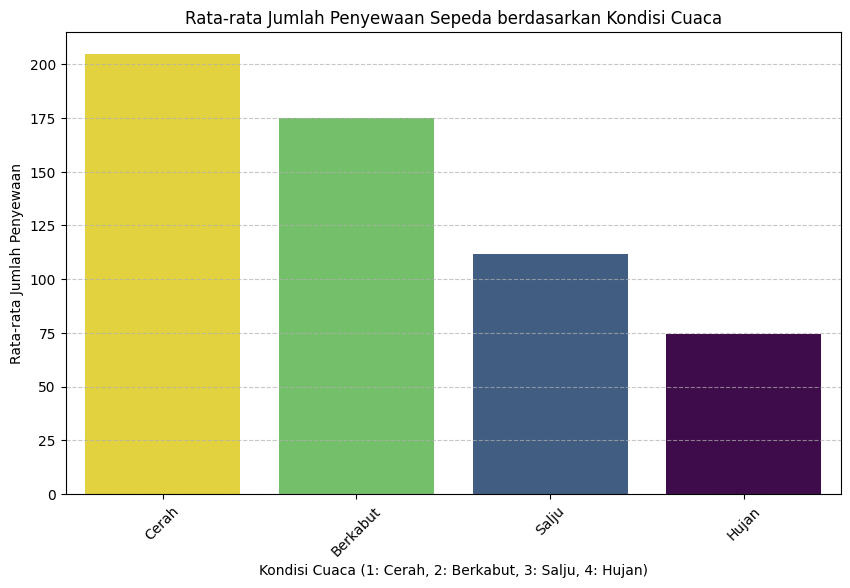

In [ ]:
# Hitung rata-rata jumlah penyewaan berdasarkan kondisi cuaca
mean_cnt_by_weather = df.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)

# Normalisasi nilai untuk palet warna
norm = plt.Normalize(mean_cnt_by_weather.min(), mean_cnt_by_weather.max())
colors = plt.cm.viridis(norm(mean_cnt_by_weather.values))

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_cnt_by_weather.index, y=mean_cnt_by_weather.values, palette=colors)
plt.title('Rata-rata Jumlah Penyewaan Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Berkabut, 3: Salju, 4: Hujan)')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.xticks(ticks=range(4), labels=['Cerah', 'Berkabut', 'Salju', 'Hujan'], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2:

Menghitung dan memvisualisasikan total penyewaan sepeda per jam dalam grafik garis.

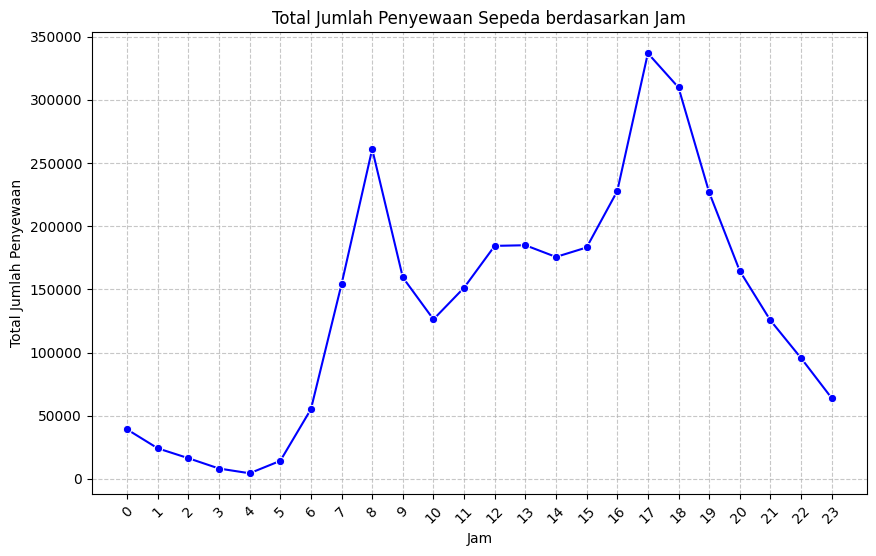

In [ ]:
# Hitung total penyewaan berdasarkan jam
total_cnt_by_hour = df.groupby('hr')['cnt'].sum()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.lineplot(x=total_cnt_by_hour.index.astype(int), y=total_cnt_by_hour.values, marker='o', color='blue')
plt.title('Total Jumlah Penyewaan Sepeda berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Jumlah Penyewaan')
plt.xticks(ticks=range(24), rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Insight:**
- Jumlah penyewaan sepeda tertinggi pada kategori cuaca yang lebih baik (kategori 1 dan 2) dan sebaliknya untuk kategori cuaca yang lebih buruk (kategori 3 dan 4)
- Biasanya penyewaan sepeda paling tinggi terjadi pada jam-jam tertentu, seperti jam sibuk di pagi (07:00 - 09:00) dan sore (17:00 - 19:00)

## Analisis Lanjutan (Opsional)

Menghitung skor RFM (Recency, Frequency, Monetary) untuk pengguna sepeda berdasarkan data sewa dengan mengelompokkan data berdasarkan musim, hari libur, dan hari kerja, serta menghitung total penyewaan, recency, frequency, dan monetary untuk setiap segmen

In [ ]:
# Pastikan kolom dteday dalam format datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Menentukan tanggal akhir untuk analisis
snapshot_date = df['dteday'].max() + pd.Timedelta(days=1)

# Menghitung total penyewaan untuk pengguna kasual dan terdaftar
df['total_rentals'] = df['casual'] + df['registered']

# Pastikan total_rentals adalah tipe data numerik
df['total_rentals'] = pd.to_numeric(df['total_rentals'], errors='coerce')

# Menghitung RFM untuk pengguna kasual dan terdaftar
rfm_df = df.groupby(['season', 'holiday', 'workingday']).agg({
    'dteday': lambda x: (snapshot_date - x.max()).days,  # Recency
    'total_rentals': ['count', 'sum']  # Frequency dan Monetary
}).reset_index()

# Mengubah nama kolom
rfm_df.columns = ['season', 'holiday', 'workingday', 'recency', 'frequency', 'monetary']

# Pastikan kolom monetary adalah tipe data numerik
rfm_df['monetary'] = pd.to_numeric(rfm_df['monetary'], errors='coerce')

# Segmentasi berdasarkan kuartil
rfm_df['r_quartile'] = pd.qcut(rfm_df['recency'], 4, labels=[4, 3, 2, 1])  # 1 = paling baru
rfm_df['f_quartile'] = pd.qcut(rfm_df['frequency'], 4, labels=[1, 2, 3, 4])  # 4 = paling sering
rfm_df['m_quartile'] = pd.qcut(rfm_df['monetary'], 4, labels=[1, 2, 3, 4])  # 4 = paling banyak

# Menghitung RFM Score
rfm_df['RFMScore'] = rfm_df['r_quartile'].astype(str) + rfm_df['f_quartile'].astype(str) + rfm_df['m_quartile'].astype(str)

# Menampilkan hasil akhir
print(rfm_df[['season', 'holiday', 'workingday', 'recency', 'frequency', 'monetary', 'RFMScore']].head())

  season holiday workingday  recency  frequency  monetary RFMScore
0      1       0          0        2       1284  23779353      432
1      1       0          1        1       2794  22212143      432
2      1       1          0        7        164    998890      421
3      2       0          0      198       1247  92413102      124
4      2       0          1      195       3066  89674174      143


Visualisasi ini menunjukkan distribusi total pengeluaran pengguna berdasarkan analisis RFM, dengan histogram yang menampilkan frekuensi pengeluaran serta kurva estimasi kepadatan untuk memberikan gambaran lebih jelas tentang sebaran data.


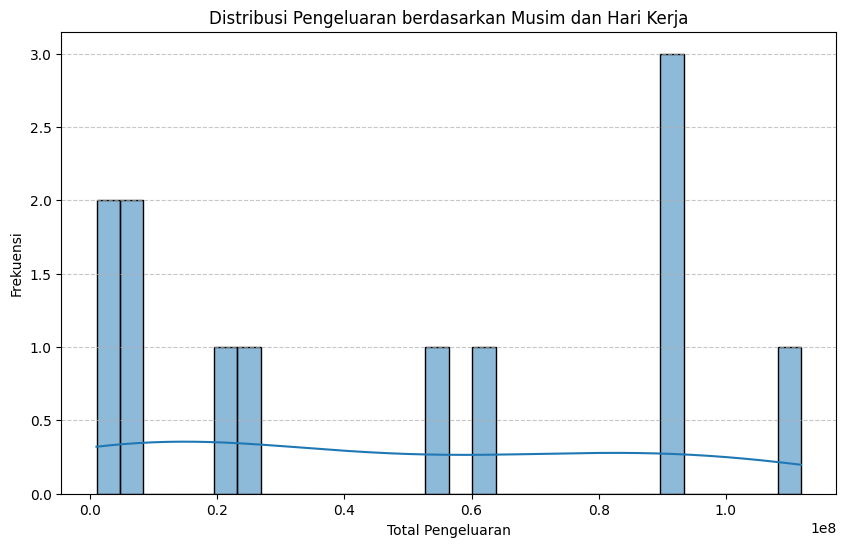

In [ ]:
# Visualisasi distribusi monetary
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['monetary'], bins=30, kde=True)
plt.title('Distribusi Pengeluaran berdasarkan Musim dan Hari Kerja')
plt.xlabel('Total Pengeluaran')
plt.ylabel('Frekuensi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Visualisasi ini menggambarkan distribusi RFM Score di antara pelanggan, menunjukkan jumlah pelanggan dalam setiap segmen RFM untuk membantu memahami perilaku dan nilai masing-masing segmen dalam basis pelanggan.


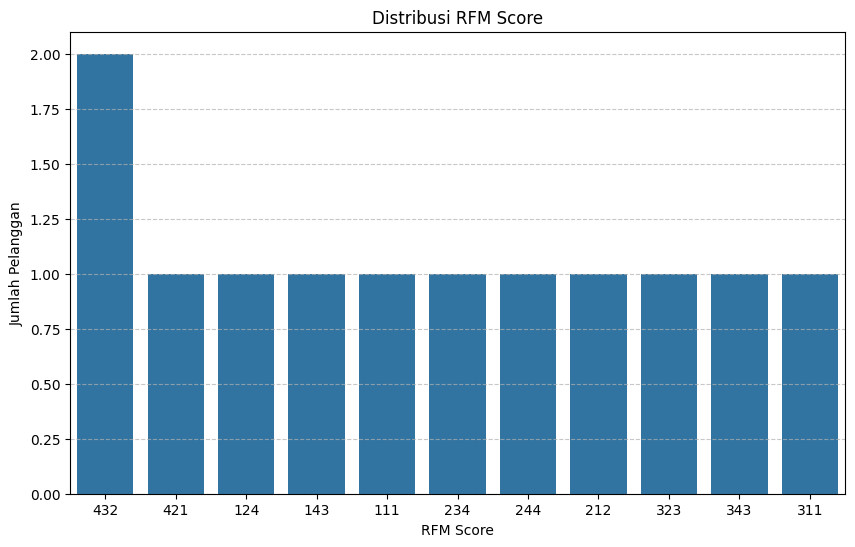

In [ ]:
# Visualisasi segmen RFM
plt.figure(figsize=(10, 6))
sns.countplot(x='RFMScore', data=rfm_df, hue=None)
plt.title('Distribusi RFM Score')
plt.xlabel('RFM Score')
plt.ylabel('Jumlah Pelanggan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight:**
- Terdapat variasi dalam nilai RFM, menunjukkan adanya segmen pelanggan dengan tingkat loyalitas dan pengeluaran yang berbeda-beda.
- Pelanggan dengan skor RFM tinggi (432) adalah yang paling berharga, dengan frekuensi pembelian yang baik dan pengeluaran tinggi. Strategi retensi perlu difokuskan pada mereka.

## Conclusion

**Conclution pertanyaan 1**
-  Rata-rata jumlah penyewaan sepeda paling tinggi terjadi pada kondisi cuaca cerah menunjukkan bahwa cuaca yang baik mendorong lebih banyak orang untuk menyewa sepeda.
- Kondisi cuaca seperti hujan dan salju menunjukkan rata-rata penyewaan yang lebih rendah, menandakan bahwa cuaca ekstrem mengurangi minat masyarakat untuk menggunakan layanan penyewaan sepeda.

**Conclution pertanyaan 2**
-  Data menunjukkan bahwa penyewaan sepeda mencapai puncaknya pada jam-jam tertentu, biasanya di pagi hari (sekitar pukul 8-9) dan sore hari (sekitar pukul 17-18). Ini mencerminkan pola penggunaan sepeda oleh orang-orang yang berangkat ke tempat kerja atau pulang dari aktivitas sehari-hari.